In [1]:
import os
os.chdir('/home/reffert/DeepAR_InfluenzaForecast')
from PythonFiles.model import model, preprocessing, split_forecasts_by_week, plot_coverage, print_forecasts_by_week, forecast_by_week, train_test_split
from PythonFiles.Configuration import Configuration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.rolling_dataset import generate_rolling_dataset,StepStrategy
config = Configuration()
influenza_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/influenza.csv", sep=',')
population_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/PopulationVector.csv", sep=',')
neighbourhood_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/AdjacentMatrix.csv", sep=',', index_col=0)

In [2]:
config.train_start_time = datetime(1999,1,1,0,0,0)#datetime(2010,1,1,0,0,0)
config.train_end_time = datetime(2016,9,30,23,0,0)
config.test_end_time = datetime(2018,9,30,23,0,0)
overall_evaluation_df = pd.DataFrame()

data_splits_dict = {}
output_dict = {}

locations = list(influenza_df.location.unique())
#Process the df into a uniformly spaced df
df = influenza_df.loc[influenza_df.location.isin(locations), ['value', 'location', 'date','week']]
df = preprocessing(config, df, check_count=False, output_type="corrected_df")
for location in locations:
    df.loc[df.location == location, "population"] = int(population_df.loc[population_df.Location == location, "2011"].values[0])
    df.loc[df.location == location, locations] = neighbourhood_df.loc[neighbourhood_df.index==location,locations].values[0]

# Creating the different splits

In [3]:
# Data split with no additional features and training start in 2010
data_splits_dict["without_features_2001"] = list(train_test_split(config, df, False))
data_splits_dict["with_features_2001"] = list(train_test_split(config, df, True))

# Change the beginning of the training period
config.train_start_time = datetime(2010,1,1,0,0,0)
data_splits_dict["without_features_2010"] = list(train_test_split(config, df, False))
data_splits_dict["with_features_2010"] = list(train_test_split(config, df, True))

# Model fitting

In [4]:
model_dict = {"DeepAR":config.deeparestimator, "FFNN":config.feedforwardestimator}
for data_split in data_splits_dict.keys():
    print(data_split)
    forecasts_dict, evaluator_df_dict = forecast_by_week(config, data_splits_dict[data_split][0], data_splits_dict[data_split][1], locations, model_dict)
    output_dict[data_split] = [forecasts_dict, evaluator_df_dict]
    #plot_coverage(config, evaluator_df_dict)

without_features_2001


100%|██████████| 50/50 [00:03<00:00, 16.29it/s, epoch=8/8, avg_epoch_loss=0.681]
Running evaluation: 411it [00:03, 106.59it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 115.68it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 114.39it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 116.24it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

with_features_2001


100%|██████████| 50/50 [00:26<00:00,  1.86it/s, epoch=8/8, avg_epoch_loss=0.696]
Running evaluation: 411it [00:03, 115.85it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 105.47it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 120.22it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 121.52it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

without_features_2010


100%|██████████| 50/50 [00:02<00:00, 18.21it/s, epoch=8/8, avg_epoch_loss=0.836]
Running evaluation: 411it [00:03, 116.50it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 116.13it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 115.82it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 116.35it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

with_features_2010


100%|██████████| 50/50 [00:28<00:00,  1.76it/s, epoch=8/8, avg_epoch_loss=0.965]
Running evaluation: 411it [00:03, 110.93it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 111.07it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 112.12it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 110.19it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

# Comparative Evaluation

In [5]:
final_evaluation_df = pd.DataFrame()
for data_split in output_dict.keys():
    forecasts_dict = output_dict[data_split][0]
    evaluator_df_dict = output_dict[data_split][1]
    #print(data_split)
    #plot_coverage(config, evaluator_df_dict)
    for key in evaluator_df_dict.keys():
        evaluation_df = evaluator_df_dict[key].copy()
        evaluation_df = evaluation_df.loc[evaluation_df.item_id.isin([item_id for item_id in evaluation_df.item_id if "aggregate" in item_id]),]        
        evaluation_df['ID'] = str(data_split) + str(key)
        final_evaluation_df = pd.concat([final_evaluation_df, evaluation_df])
for i in range(1,5):
    print(f"Week-{i}-Ahead")
    print(final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}" ,["ID", "mean_WIS", "MAE_Coverage"]].reset_index(drop=True))

Week-1-Ahead
                            ID    mean_WIS  MAE_Coverage
0  without_features_2001DeepAR  426.206396      0.260628
1    without_features_2001FFNN  443.551217      0.120417
2     with_features_2001DeepAR  381.894873      0.254921
3       with_features_2001FFNN  570.244960      0.067599
4  without_features_2010DeepAR  417.003059      0.268317
5    without_features_2010FFNN  485.172263      0.080609
6     with_features_2010DeepAR  507.958116      0.279589
7       with_features_2010FFNN  674.732325      0.096882
Week-2-Ahead
                            ID    mean_WIS  MAE_Coverage
0  without_features_2001DeepAR  598.896576      0.274510
1    without_features_2001FFNN  671.736305      0.115770
2     with_features_2001DeepAR  512.433959      0.258638
3       with_features_2001FFNN  643.211331      0.068472
4  without_features_2010DeepAR  474.784602      0.275340
5    without_features_2010FFNN  758.224835      0.087206
6     with_features_2010DeepAR  535.695933      0.294574
7    

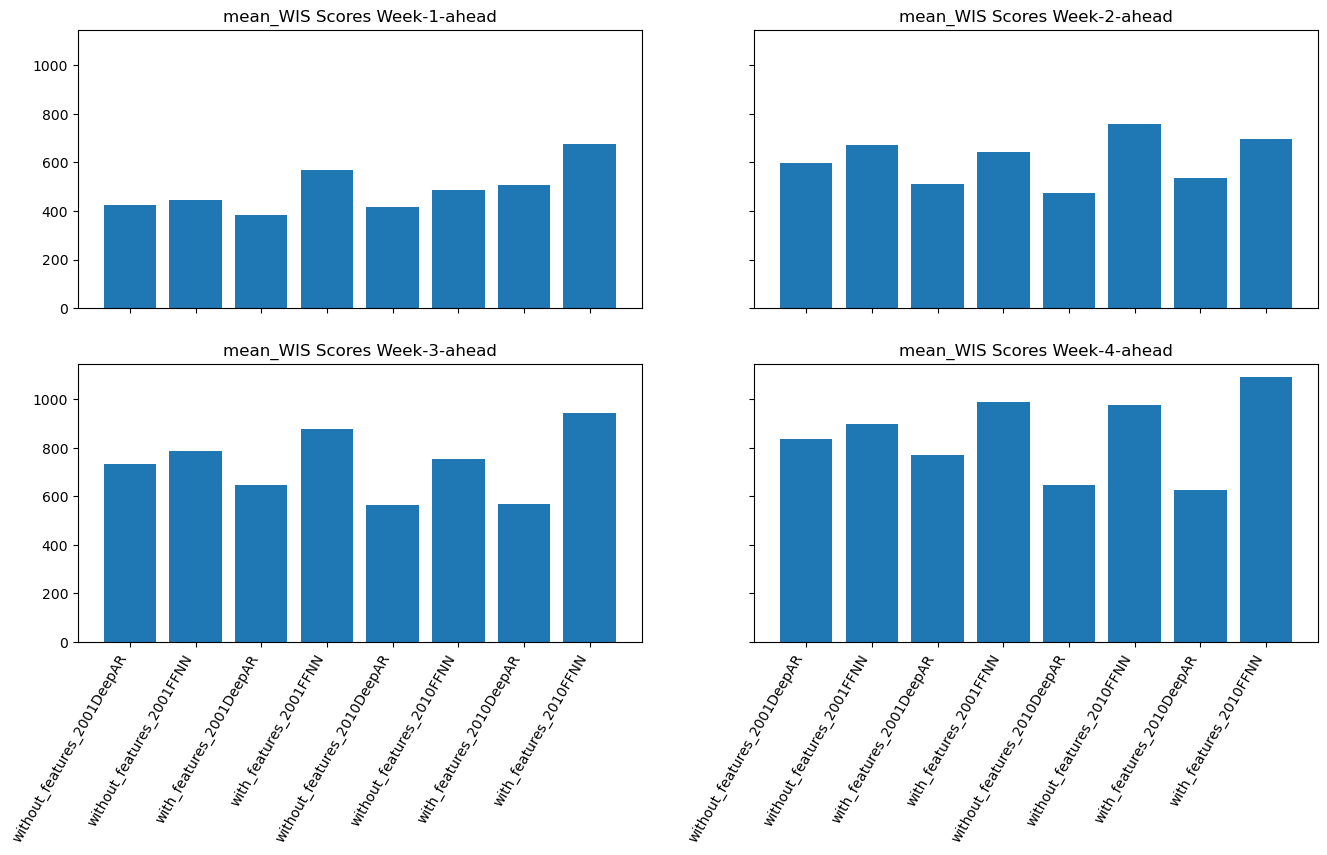

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 9), sharey=True)
for i in range(1,5):
    if i == 1:
        plotnumber = (0, 0)
    if i == 2:
        plotnumber = (0, 1)
    if i == 3:
        plotnumber = (1, 0)
    if i == 4:
        plotnumber = (1, 1)
    axs[plotnumber].bar(final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}","ID"], final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}","mean_WIS"])
    axs[plotnumber].set_title(f"mean_WIS Scores Week-{i}-ahead")
fig.autofmt_xdate(rotation=60, ha='right')
plt.show()